## **Spam Email Detection with NLP**
Spam emails are a big problem in today’s world, filling up inboxes with unwanted messages and sometimes even posing risks like scams or malware. This project, **Spam Email Detection with NLP**, focuses on solving this problem by automatically identifying whether an email is "spam" or "ham" (legitimate).

To do this, I used **Bag of Words (BoW)**, a method that turns email text into numerical data that can be understood by a machine learning model. Then, I used the **Random Forest** algorithm to classify the emails. Random Forest is great for tasks like this because it’s powerful and can handle complex patterns in data.

The goal of this project is to show how spam detection works and how important it is to have systems that keep unwanted emails out of our inboxes. With tools like these, we can save time, stay productive, and protect ourselves from email-based threats.


In [2]:
# Import necesarry libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from bs4 import BeautifulSoup
import re
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords


In [3]:
# Load the dataset. 
# Our data seperated with coma that's why we don't have put "delimeter=" part here.
df = pd.read_csv('spam.csv')

In [4]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
len(df)

5572

In [6]:
len(df["Message"])

5572

In [7]:
# We download stopwords to clean up our dataset.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eceki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Check there is any null data here or not.
df.isnull().sum()

Category    0
Message     0
dtype: int64

### Data Visualisation

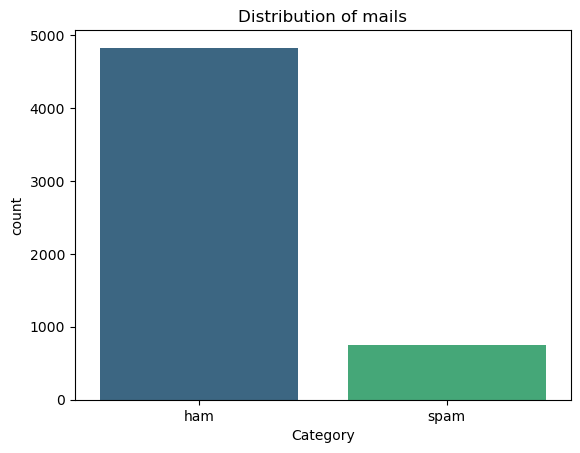

In [10]:
import seaborn as sns

sns.countplot(data=df, x='Category', hue='Category', palette='viridis', legend=False)
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Data Preprocessing

In [13]:
sample_message = df.Message[7]
sample_message

"As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"

In [14]:
# Now we need to clean all the Message's in our dataframe in a loop. 
# For this purpose we first create a function:

def process(Message):
    # Message without HTML tags
    Message = BeautifulSoup(Message).get_text()
    # Message without punctuation and numbers
    Message = re.sub("[^a-zA-Z]",' ',Message)
    # Converting into lowercase and splitting to eliminate stopwords
    Message = Message.lower()
    Message = Message.split()
    
    # Message without stopwords
    swords = set(stopwords.words("english"))                      
    # Conversion into set for fast searching
    Message = [w for w in Message if w not in swords]   
    
    # We combine splitted paragraphs with space return
    return(" ".join(Message))

In [15]:
# We clean our training data with the "process" function we created above.
# We see the status of the review process by printing a line after every 1000 reviews.

train_x_temp = []
for m in range(len(df["Message"])):        
    if (m + 1) % 500 == 0:        
        print("Number of messages processed =", m + 1)
    train_x_temp.append(process(df["Message"][m]))

C:\Users\eceki\AppData\Local\Temp\ipykernel_11952\1567669123.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  Message = BeautifulSoup(Message).get_text()


Number of messages processed = 500
Number of messages processed = 1000
Number of messages processed = 1500
Number of messages processed = 2000
Number of messages processed = 2500
Number of messages processed = 3000
Number of messages processed = 3500
Number of messages processed = 4000
Number of messages processed = 4500
Number of messages processed = 5000
Number of messages processed = 5500


### Split train and test set.

In [17]:
# We choose 1 for "spam" and 0 for "ham".
df.loc[df["Category"] == "spam", "Category"] = 1
df.loc[df["Category"] == "ham", "Category"] = 0

In [18]:
df["Category"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: object

In [19]:
df["Category"] = df["Category"].astype(int)

In [20]:
df["Category"]

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int32

In [21]:
x = train_x_temp
y = np.array(df["Category"])

# Splitting train and test set. 
train_x, test_x, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 3)

In [22]:
y

array([0, 0, 1, ..., 0, 0, 0])

### Bag of Words

In [24]:
# We have cleaned our data. Now for to work with AI we need to convert this data into a matrix called bag of words. 
# For this purpose, we use the CountVectorizer tool in sklearn.

# We create a bag of words with a maximum of 500 words using the countvectorizer function in sklearn.
vectorizer = CountVectorizer( max_features = 500 )

# We convert our train data into feature vector matrix.
train_x = vectorizer.fit_transform(train_x)

In [25]:
train_x

<5014x500 sparse matrix of type '<class 'numpy.int64'>'
	with 23194 stored elements in Compressed Sparse Row format>

In [26]:
# We convert it to an array because it needs to be an array for the fit operation.
train_x = train_x.toarray()
train_y = y_train

In [27]:
train_x.shape, train_y.shape

((5014, 500), (5014,))

In [28]:
train_y

array([0, 0, 0, ..., 0, 0, 1])

### Random Forest

In [30]:
model = RandomForestClassifier(n_estimators = 100, random_state=42)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

### Now let's continue with test data.

In [32]:
# We convert our test data to feature vector matrix.
# We repeat the same operations (converting to bag of words) done for trian data for test data.

test_x = vectorizer.transform(test_x)

In [33]:
test_x

<558x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2573 stored elements in Compressed Sparse Row format>

In [34]:
test_x = test_x.toarray()

In [35]:
test_x.shape

(558, 500)

### Prediction Time

In [37]:
test_predict = model.predict(test_x)
accuracy = roc_auc_score(y_test, test_predict)

In [38]:
print("Accuracy rate: %", accuracy * 100)

Accuracy rate: % 94.30211108833777
